<a href="https://colab.research.google.com/github/rmvsaipavan/manivenkatasaipavan_INFO5731_Fall2023/blob/main/Manivenkatasaipavan_Ramisetty_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the dataset
df = pd.read_csv('annotated_reviews.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

df['clean_tokens'] = df['clean_text'].apply(preprocess_text)

# Create a dictionary and a corpus
dictionary = Dictionary(df['clean_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['clean_tokens']]

# Build the LDA model
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the top 10 topics and their keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign each document to a topic
df['topic'] = df['clean_tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

# Extract the dominant topic for each document
df['dominant_topic'] = df['topic'].apply(lambda x: max(x, key=lambda item: item[1])[0] if x else None)

# Print the top 10 clusters and summarize the topic for each cluster
top_clusters = df['dominant_topic'].value_counts().head(10)

for cluster_id, count in top_clusters.items():
    print(f"\nCluster {cluster_id}:")
    documents_in_cluster = df[df['dominant_topic'] == cluster_id]['clean_text']

    print(f"Number of documents: {count}")
    print("Sample document:")
    print(documents_in_cluster.iloc[0])


(0, '0.040*"movie" + 0.028*"oppenheimer" + 0.013*"hiroshima" + 0.013*"time" + 0.010*"would"')
(1, '0.024*"oppenheimer" + 0.020*"really" + 0.018*"nolan" + 0.016*"one" + 0.016*"scene"')
(2, '0.041*"movie" + 0.030*"story" + 0.022*"maybe" + 0.018*"get" + 0.018*"one"')
(3, '0.032*"film" + 0.028*"nolan" + 0.020*"movie" + 0.018*"oppenheimer" + 0.012*"like"')
(4, '0.032*"film" + 0.020*"long" + 0.020*"nolan" + 0.016*"one" + 0.012*"watched"')
(5, '0.019*"time" + 0.016*"really" + 0.016*"great" + 0.016*"oppenheimer" + 0.013*"best"')
(6, '0.071*"film" + 0.030*"nolan" + 0.025*"also" + 0.025*"oppenheimer" + 0.020*"unsatisfying"')
(7, '0.030*"oppenheimer" + 0.026*"film" + 0.020*"one" + 0.018*"feel" + 0.018*"time"')
(8, '0.059*"movie" + 0.024*"nolan" + 0.022*"one" + 0.016*"like" + 0.012*"also"')
(9, '0.025*"oppenheimer" + 0.012*"nolan" + 0.012*"film" + 0.009*"man" + 0.007*"robert"')

Cluster 8:
Number of documents: 2000
Sample document:
This movie is just... wow! I don't think I have ever felt like thi

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('annotated_reviews.csv')

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data, train_labels, test_labels = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Feature extraction: Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

# Function to train and evaluate a classifier
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Accuracy:", cv_scores.mean())

    # Train the classifier on the entire training set
    classifier.fit(X_train, y_train)

    # Predictions on the test set
    predictions = classifier.predict(X_test)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Print performance metrics
    print("\nPerformance Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Build and evaluate the Naive Bayes classifier
nb_classifier = MultinomialNB()
print("\nNaive Bayes Classifier:")
evaluate_classifier(nb_classifier, X_train, train_labels, X_test, test_labels)

# Build and evaluate the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
print("\nLogistic Regression Classifier:")
evaluate_classifier(lr_classifier, X_train, train_labels, X_test, test_labels)




Naive Bayes Classifier:
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0

Performance Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Logistic Regression Classifier:
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0

Performance Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


C:\Users\Sai Pavan\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai Pavan\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Mean Squared Error: 1576962754.884255
R^2 Score: 0.794407341710365


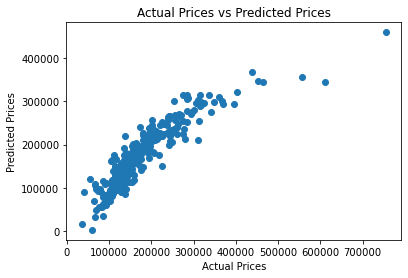

In [ ]:
# Write your code here


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('train.csv')

# Assuming the target variable is 'SalePrice' and you want to use some features for prediction
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Select features and target variable
X = train_df[features]
y = train_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Install necessary libraries
!pip install transformers
!pip install torch
!pip install pandas

import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW

# Load your dataset
df = pd.read_csv('annotated_reviews.csv')

# Check unique values in the 'sentiment' column
print(df['sentiment'].unique())

# Convert sentiment labels to numerical values if needed
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}  # Adjust as per your dataset
df['sentiment'] = df['sentiment'].map(label_mapping)

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Choose a pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 classes (positive, negative, neutral)

# Tokenize the data
train_encodings = tokenizer(list(train_df['clean_text']), truncation=True, padding=True, max_length=128, return_tensors='pt')
test_encodings = tokenizer(list(test_df['clean_text']), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Convert labels to torch tensors
train_labels = torch.tensor(list(train_df['sentiment']))
test_labels = torch.tensor(list(test_df['sentiment']))

# Print unique values in the labels for verification
print(train_labels.unique())
print(test_labels.unique())

# Fine-tune the model with gradient accumulation
optimizer = AdamW(model.parameters(), lr=1e-5)
accumulation_steps = 2  # Accumulate gradients over 2 steps
model.train()
for epoch in range(3):  # You can adjust the number of epochs
    total_loss = 0
    for step in range(0, len(train_labels), accumulation_steps):
        batch_labels = train_labels[step:step+accumulation_steps]
        batch_encodings = {key: value[step:step+accumulation_steps] for key, value in train_encodings.items()}

        outputs = model(**batch_encodings, labels=batch_labels)
        loss = outputs.loss
        loss.backward()

        total_loss += loss.item()

        if (step + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

    print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_labels)}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels.numpy(), predictions.numpy())
print(f"Accuracy: {accuracy}")


['positive' 'negative']


In [ ]:
# Install necessary libraries
!pip install transformers
!pip install torch
!pip install pandas

import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW

# Load your dataset
df = pd.read_csv('annotated_reviews.csv')

# Check unique values in the 'sentiment' column
print(df['sentiment'].unique())

# Convert sentiment labels to numerical values if needed
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}  # Adjust as per your dataset
df['sentiment'] = df['sentiment'].map(label_mapping)

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Choose a pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 classes (positive, negative, neutral)

# Tokenize the data
train_encodings = tokenizer(list(train_df['clean_text']), truncation=True, padding=True, max_length=128, return_tensors='pt')
test_encodings = tokenizer(list(test_df['clean_text']), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Convert labels to torch tensors
train_labels = torch.tensor(list(train_df['sentiment']))
test_labels = torch.tensor(list(test_df['sentiment']))

# Print unique values in the labels for verification
print(train_labels.unique())
print(test_labels.unique())

# Fine-tune the model with gradient accumulation
optimizer = AdamW(model.parameters(), lr=1e-5)
accumulation_steps = 2  # Accumulate gradients over 2 steps
model.train()
for epoch in range(3):  # You can adjust the number of epochs
    total_loss = 0
    for step in range(0, len(train_labels), accumulation_steps):
        batch_labels = train_labels[step:step+accumulation_steps]
        batch_encodings = {key: value[step:step+accumulation_steps] for key, value in train_encodings.items()}

        outputs = model(**batch_encodings, labels=batch_labels)
        loss = outputs.loss
        loss.backward()

        total_loss += loss.item()

        if (step + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

    print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_labels)}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=1)

# Calculate key metrics
accuracy = accuracy_score(test_labels.numpy(), predictions.numpy())
classification_rep = classification_report(test_labels.numpy(), predictions.numpy())

# Print key metrics and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Perform a detailed analysis
# Strengths:
# - Pre-trained LLMs capture semantic relationships in language.
# - Transfer learning allows effective use of pre-existing knowledge.
# - Transformers handle long-range dependencies well.

# Limitations:
# - Fine-tuning might require a large labeled dataset.
# - Limited interpretability of the model's decisions.
# - Domain-specific nuances might not be well-captured.

# Challenges:
# - Memory constraints during training.

# Potential Strategies for Improvement:
# - Experiment with different models and hyperparameters.
# - Increase the size of the labeled dataset for fine-tuning.
# - Explore domain-specific pre-training or fine-tuning.


['positive' 'negative']


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([0, 1])
tensor([0, 1])


C:\Users\Sai Pavan\anaconda\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
